In [1]:
# -*- coding: utf-8 -*-
#  File: otus_pro_hw3.ipynb
#  Project: 'OTUS PRO Homework #3'
#  Created by Gennady Matveev (gm@og.ly) on 14-01-2022.

![OTUS.ML.Pro](https://docs.google.com/uc?export=download&id=1WNdJ3EbDWli0UARUhWLwGmC5_RUuIJ7n)
<!-- https://drive.google.com/file/d/1WNdJ3EbDWli0UARUhWLwGmC5_RUuIJ7n/view?usp=sharing -->

# **$Homework$** **$3$**  
**OTUS Machine Learning Professional**

# PyOD

Goal:  
- Try outlier detection methods from PyOD library
- Use combination of methods with results averaging

Means:  
- All meaningful programming will be done in PyOD

Dataset:
- Credit Card Fraud Detection 
https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

Abbreviations:
- EDA: exploratory data analysis
- PP: preprocessing

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Google-colab-specific-part" data-toc-modified-id="Google-colab-specific-part-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Google colab specific part</a></span></li><li><span><a href="#Import-libraries-and-setup-notebook" data-toc-modified-id="Import-libraries-and-setup-notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import libraries and setup notebook</a></span><ul class="toc-item"><li><span><a href="#Miscellaneius-settings" data-toc-modified-id="Miscellaneius-settings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Miscellaneius settings</a></span></li><li><span><a href="#ML-parameters" data-toc-modified-id="ML-parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ML parameters</a></span></li></ul></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Choose-full-or-partial-data" data-toc-modified-id="Choose-full-or-partial-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Choose full or partial data</a></span></li></ul></li><li><span><a href="#Dataset-contamination" data-toc-modified-id="Dataset-contamination-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset contamination</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Apply-PyOD" data-toc-modified-id="Apply-PyOD-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Apply PyOD</a></span></li><li><span><a href="#Compare-results-with-and-without-giving-the-model-contamination-parameter" data-toc-modified-id="Compare-results-with-and-without-giving-the-model-contamination-parameter-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare results with and without giving the model contamination parameter</a></span><ul class="toc-item"><li><span><a href="#iForest-without-parameter" data-toc-modified-id="iForest-without-parameter-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>iForest without parameter</a></span></li><li><span><a href="#iForest-with-parameter" data-toc-modified-id="iForest-with-parameter-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>iForest with parameter</a></span></li><li><span><a href="#LOF-(Local-Outlier-Factor)" data-toc-modified-id="LOF-(Local-Outlier-Factor)-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>LOF (Local Outlier Factor)</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#COPOD-without-contamination-parameter" data-toc-modified-id="COPOD-without-contamination-parameter-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>COPOD without contamination parameter</a></span></li><li><span><a href="#COPOD-with-contamination-parameter" data-toc-modified-id="COPOD-with-contamination-parameter-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>COPOD with contamination parameter</a></span></li><li><span><a href="#Parallel-estimation-with-several-models-avaraging-(SUOD)" data-toc-modified-id="Parallel-estimation-with-several-models-avaraging-(SUOD)-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Parallel estimation with several models avaraging (SUOD)</a></span></li></ul></li><li><span><a href="#Visualize-results-in-3D" data-toc-modified-id="Visualize-results-in-3D-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Visualize results in 3D</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Observations</a></span></li></ul></div>

<a href="https://colab.research.google.com/github/oort77/OTUS_PRO_HW3/blob/main/notebooks/otus_pro_hw3_pyod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

### Google colab specific part

Please uncomment and run the cell below to install dependencies.  Restart of runtime is required after installation.
Typical runtime on colab with 15% of data is around 30 minutes (to include installation of libraries ~ 2-3 minutes).
You can change the amount of data to play with - cf. "rand_part" parameter below. Notebook with computations on all data is here: <a href="https://colab.research.google.com/github/oort77/OTUS_PRO_HW3/blob/main/notebooks/otus_pro_hw3_pyod_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

In [2]:
# !pip install -r "https://drive.google.com/uc?export=download&id=14TOXCFVR7VPnfNiKimcz-BUUaJastb4h"

### Import libraries and setup notebook

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, \
    MinMaxScaler, RobustScaler
from umap import UMAP
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.knn import KNN
from pyod.models.lof import LOF
# from pyod.models.hbos import HBOS
from pyod.models.loci import LOCI
from pyod.models.suod import SUOD
from pyod.models.copod import COPOD
# from pyod.models.xgbod import XGBOD
from pyod.models.iforest import IForest


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scikitplot as skplt 
import seaborn as sns
import plotly.express as px
import random
import re
from IPython.core.display import display, HTML
import warnings


#### Miscellaneius settings 

In [4]:
%matplotlib inline
display(HTML("<style>.container {width:80% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"]=(12,4)
sns.set(rc={'figure.figsize': (12, 4)})
warnings.filterwarnings("ignore")
pd.options.display.precision = 4
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#### ML parameters

In [5]:
random_state = 42
n_jobs = 2

### Load data

In [6]:
data = pd.read_csv("https://www.dropbox.com/s/lw1wjtwv6z80z5m/archive.zip?dl=1", compression = "zip")

#Throw away "Time" column
data = data.astype("float32").iloc[:,1:]
data.head()

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0 -1.3598 -0.0728  2.5363  1.3782 -0.3383  0.4624  0.2396  0.0987  0.3638   
1  1.1919  0.2662  0.1665  0.4482  0.0600 -0.0824 -0.0788  0.0851 -0.2554   
2 -1.3584 -1.3402  1.7732  0.3798 -0.5032  1.8005  0.7915  0.2477 -1.5147   
3 -0.9663 -0.1852  1.7930 -0.8633 -0.0103  1.2472  0.2376  0.3774 -1.3870   
4 -1.1582  0.8777  1.5487  0.4030 -0.4072  0.0959  0.5929 -0.2705  0.8177   

      V10     V11     V12     V13     V14     V15     V16     V17     V18  \
0  0.0908 -0.5516 -0.6178 -0.9914 -0.3112  1.4682 -0.4704  0.2080  0.0258   
1 -0.1670  1.6127  1.0652  0.4891 -0.1438  0.6356  0.4639 -0.1148 -0.1834   
2  0.2076  0.6245  0.0661  0.7173 -0.1659  2.3459 -2.8901  1.1100 -0.1214   
3 -0.0550 -0.2265  0.1782  0.5078 -0.2879 -0.6314 -1.0596 -0.6841  1.9658   
4  0.7531 -0.8228  0.5382  1.3459 -1.1197  0.1751 -0.4514 -0.2370 -0.0382   

      V19     V20     V21     V22     V23     V24     V25     V26     V27  \
0  0.4040  0.2514 -0.0183  0.2778 -0.1105  0.0669  0.1285 -0.1891  0.1336   
1 -0.1458 -0.0691 -0.2258 -0.6387  0.1013 -0.3398  0.1672  0.1259 -0.0090   
2 -2.2619  0.5250  0.2480  0.7717  0.9094 -0.6893 -0.3276 -0.1391 -0.0554   
3 -1.2326 -0.2080 -0.1083  0.0053 -0.1903 -1.1756  0.6474 -0.2219  0.0627   
4  0.8035  0.4085 -0.0094  0.7983 -0.1375  0.1413 -0.2060  0.5023  0.2194   

      V28  Amount  Class  
0 -0.0211  149.62    0.0  
1  0.0147    2.69    0.0  
2 -0.0598  378.66    0.0  
3  0.0615  123.50    0.0  
4  0.2152   69.99    0.0

#### Choose full or partial data

In [7]:
rand_part = 0.15 # for testing of computationally expensive parts
partial = 1 # for rapid tests set to 1 and possibly change rand_part ratio above

# Randomly select rand_part of rows
part = sorted(random.choices(range(data.shape[0]), k=int(data.shape[0]*rand_part)))
if partial == 0:
    X, y = data.iloc[:,:-1], data.iloc[:,-1]
else:
    X, y = data.iloc[part,:-1], data.iloc[part,-1]

X_train, X_test, y_train, y_test = train_test_split(
                X, y, stratify=y, test_size=0.25, random_state=random_state)

### Dataset contamination

In [8]:
y[y==0].count(), y[y==1].count(), round(y[y==1].count()/y[y==0].count(), 5)

(42646, 75, 0.00176)

<div class="alert alert-block alert-success">
<b>"Class"</b> column contains 492 fraud values, only 0.17% of the whole dataset. We will use this number as an "expert estimate".
</div>

In [9]:
contamination = 0.00173

### Preprocessing

In [10]:
# X = X.copy().drop_duplicates()
X = RobustScaler().fit_transform(X).astype("float32")

### Apply PyOD

In [15]:
def show_ad(model, X, y, n_jobs=n_jobs, random_state=random_state, **p):
    clf = model(**p)
    clf.fit(X_train)
    # Get predictions labels and outlier scores of the training data
    y_train_pred = clf.labels_ 
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # Get prediction on the test data
    y_test_pred = clf.predict(X_test) 
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # UMAP-transform feature space
    umap = UMAP(n_components=2, init='random',
                       random_state=random_state)
    proj = umap.fit(X)
    X_train_umap = proj.transform(X_train)
    X_test_umap = proj.transform(X_test)

    # Print metrics
    print("\nOn Training Data:")
    evaluate_print(clf, y_train, y_train_scores)
    print(f"Outliers detected: {len(y_train[y_train_pred==1]): 5d}")
    print("\nOn Test Data:")
    evaluate_print(clf, y_test, y_test_scores)
    print(f"Outliers detected: {len(y_test[y_test_pred==1]): 5d}\n")
    
    # Visualize the results
    p = re.compile("^[^\(]*")
    model_name = p.search(str(model())).group()
    visualize(model_name, X_train_umap, y_train.values, 
              X_test_umap, y_test.values, y_train_pred, 
              y_test_pred, show_figure=True, save_figure=False)
    
    _ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, \
                        figsize=(6,6), title=f"Confusion matrix for {model_name}: Train")
    _ = skplt.metrics.plot_confusion_matrix(y_test,y_test_pred, normalize=False, \
                        figsize=(6,6), title=f"Confusion matrix for  {model_name}: Test")
    return y_train_pred, y_test_pred

### Compare results with and without giving the model contamination parameter

####  iForest without parameter

<div class="alert alert-block alert-success">
<b>No contamination parameter:</b> In fact, PyOD uses value of 10% by default
</div>


On Training Data:
IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0) ROC:0.9579, precision @ rank n:0.2321
Outliers detected:  3204

On Test Data:
IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0) ROC:0.9282, precision @ rank n:0.3684
Outliers detected:  1052



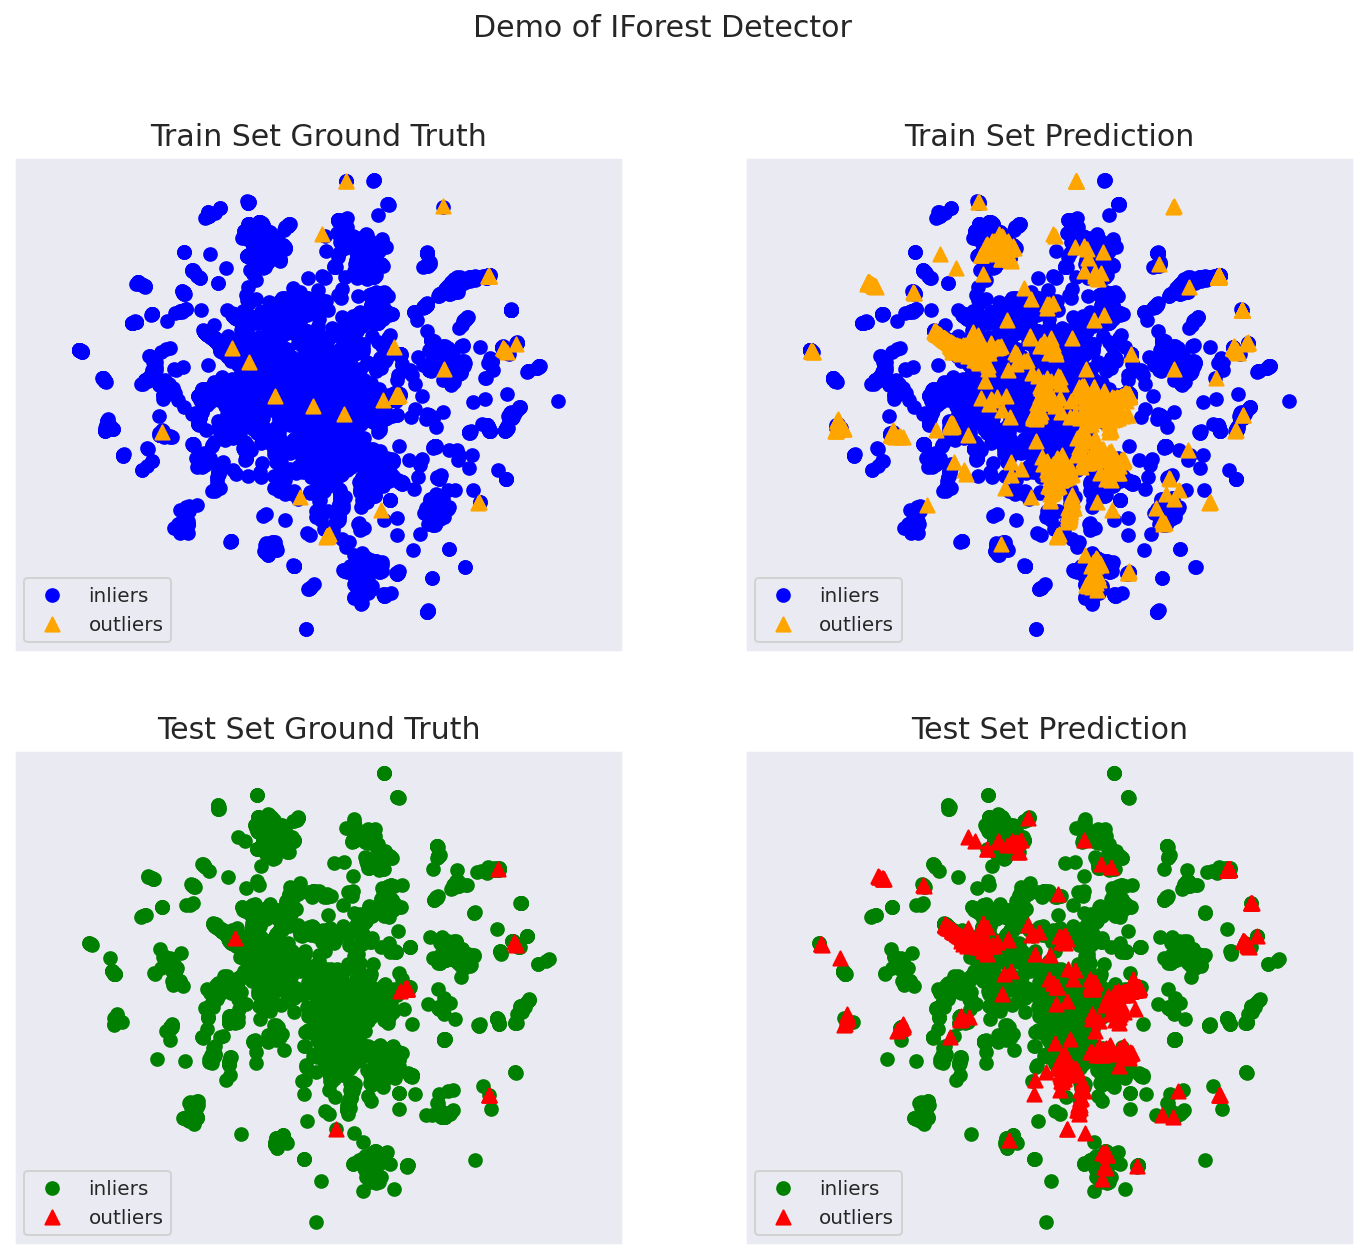

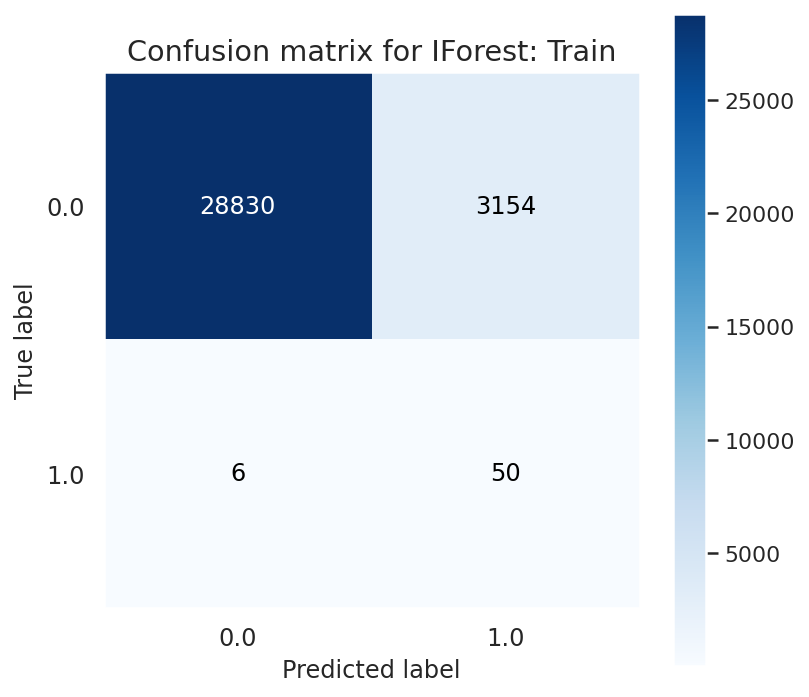

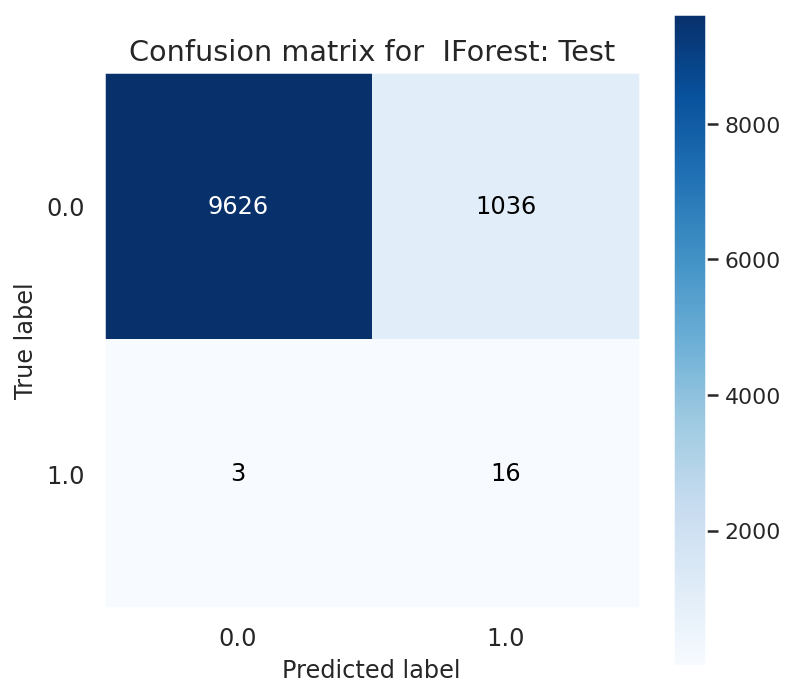

In [16]:
predictions_iforest = show_ad(IForest, X, y, random_state=random_state)

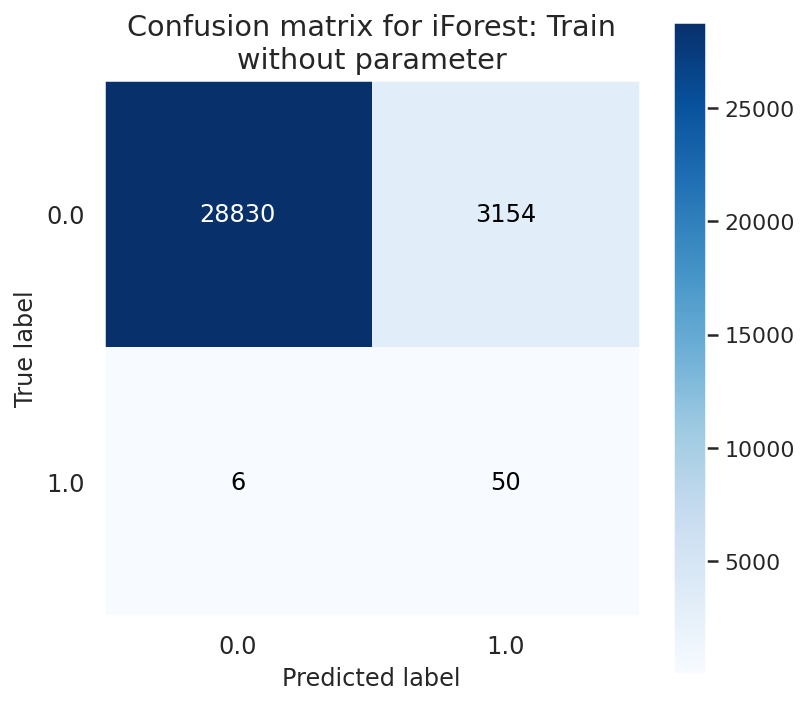

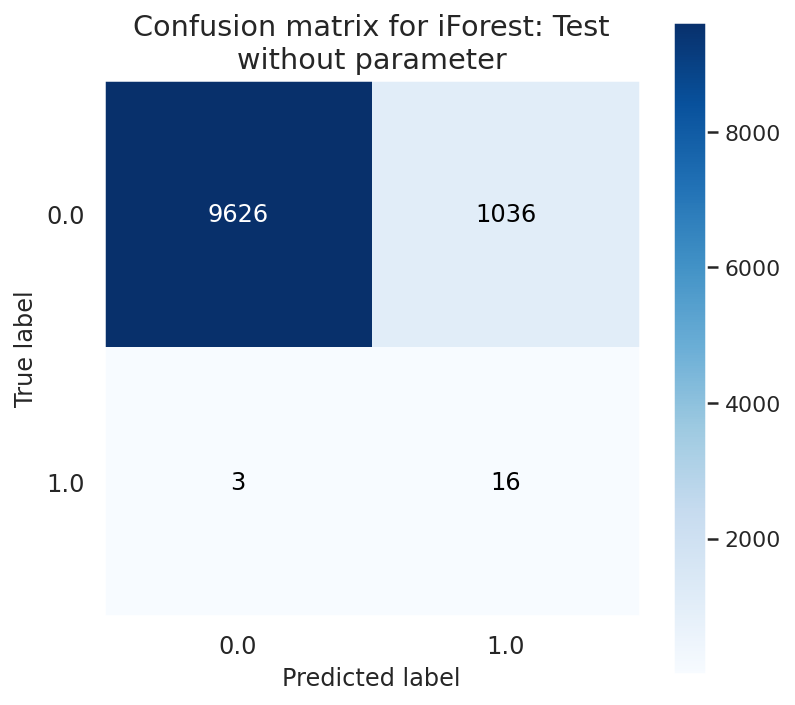

In [17]:
y_train_pred, y_test_pred = predictions_iforest
_ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, \
        figsize=(6,6), title="Confusion matrix for iForest: Train\nwithout parameter")
_ = skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, \
        figsize=(6,6), title="Confusion matrix for iForest: Test\nwithout parameter")

####  iForest with parameter


On Training Data:
IForest(behaviour='old', bootstrap=False, contamination=0.00173,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=None, verbose=0) ROC:0.9623, precision @ rank n:0.2321
Outliers detected:    56

On Test Data:
IForest(behaviour='old', bootstrap=False, contamination=0.00173,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=None, verbose=0) ROC:0.9347, precision @ rank n:0.3684
Outliers detected:    20



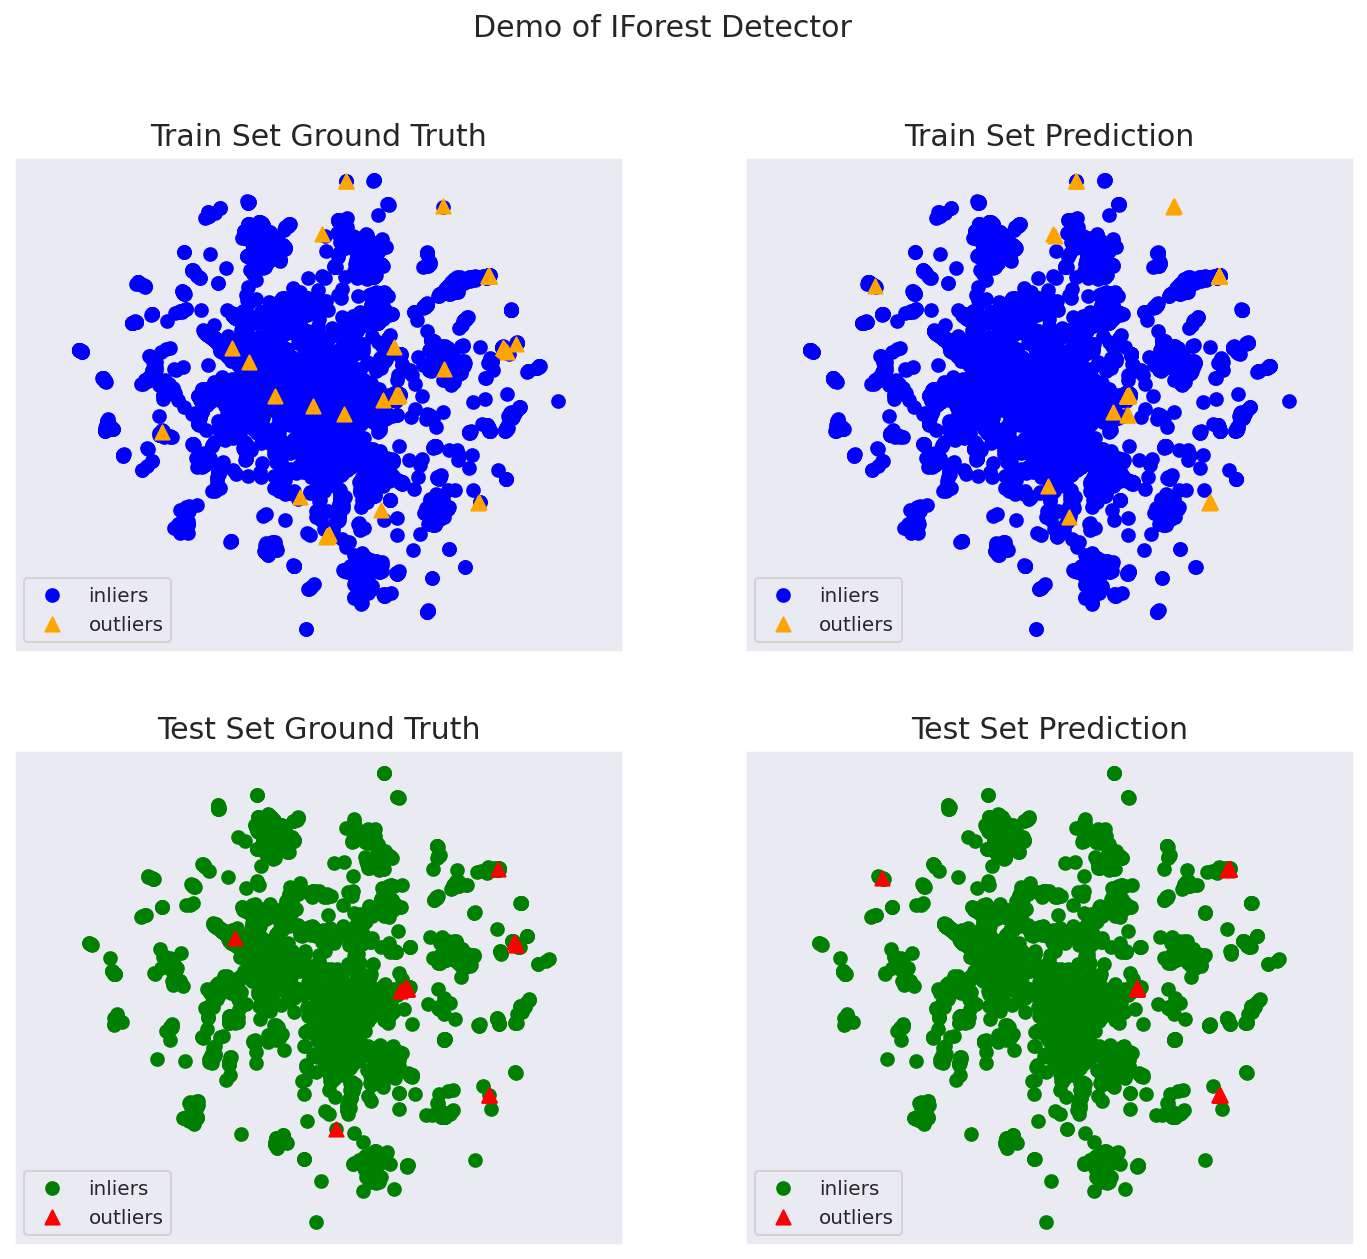

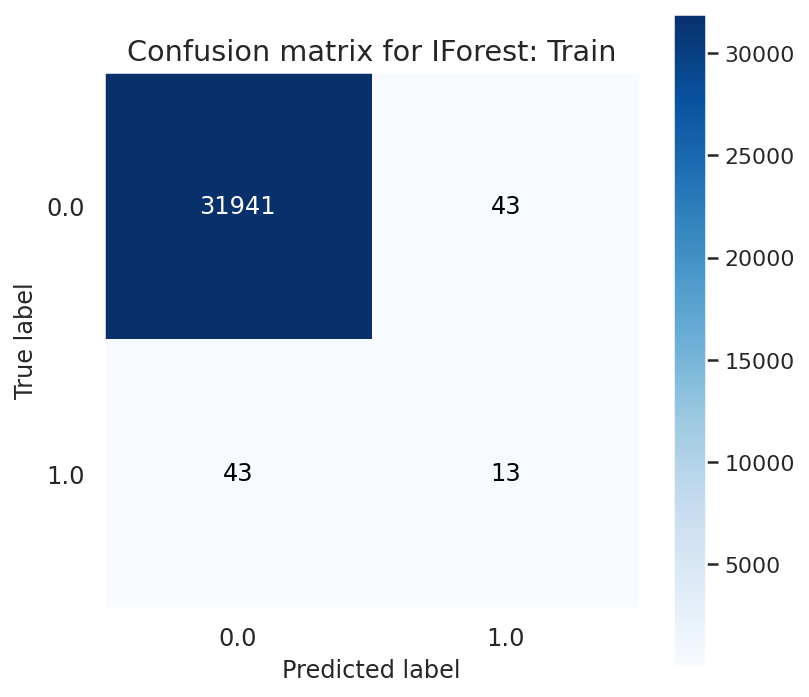

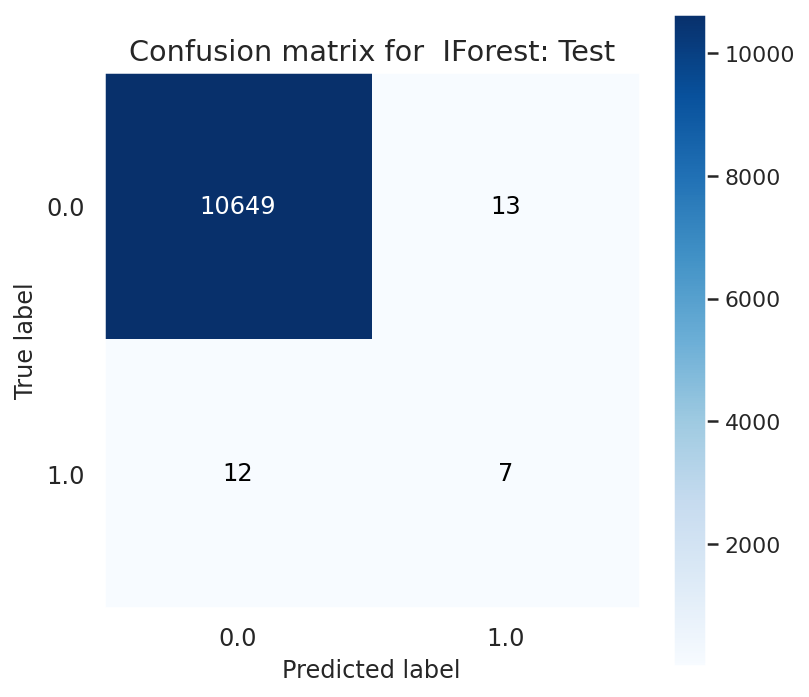

In [18]:
predictions_iforest_with_params = show_ad(IForest, X, y, contamination=contamination, random_state=random_state)

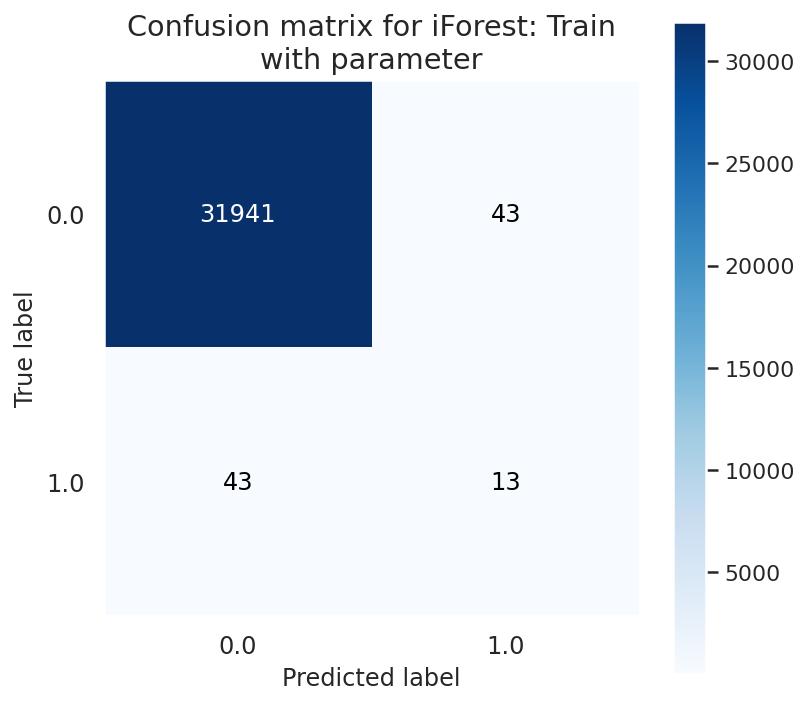

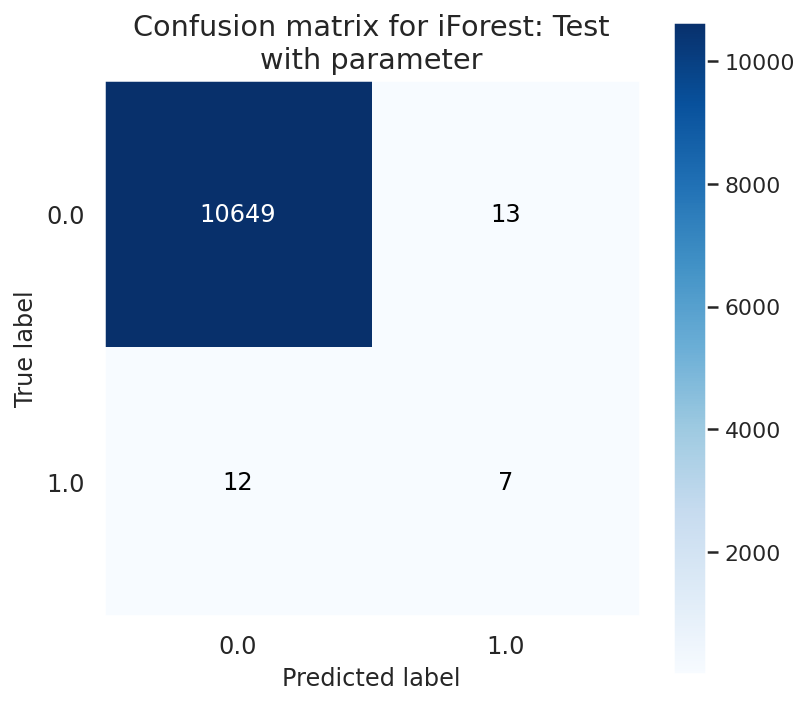

In [19]:
y_train_pred, y_test_pred = predictions_iforest_with_params
_ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, \
            figsize=(6,6), title="Confusion matrix for iForest: Train\nwith parameter")
_ = skplt.metrics.plot_confusion_matrix(y_test,y_test_pred, normalize=False, \
            figsize=(6,6), title="Confusion matrix for iForest: Test\nwith parameter")

#### LOF (Local Outlier Factor)


On Training Data:
LOF(algorithm='auto', contamination=0.00173, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2) ROC:0.8513, precision @ rank n:0.3036
Outliers detected:    56

On Test Data:
LOF(algorithm='auto', contamination=0.00173, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2) ROC:0.8888, precision @ rank n:0.1053
Outliers detected:    18



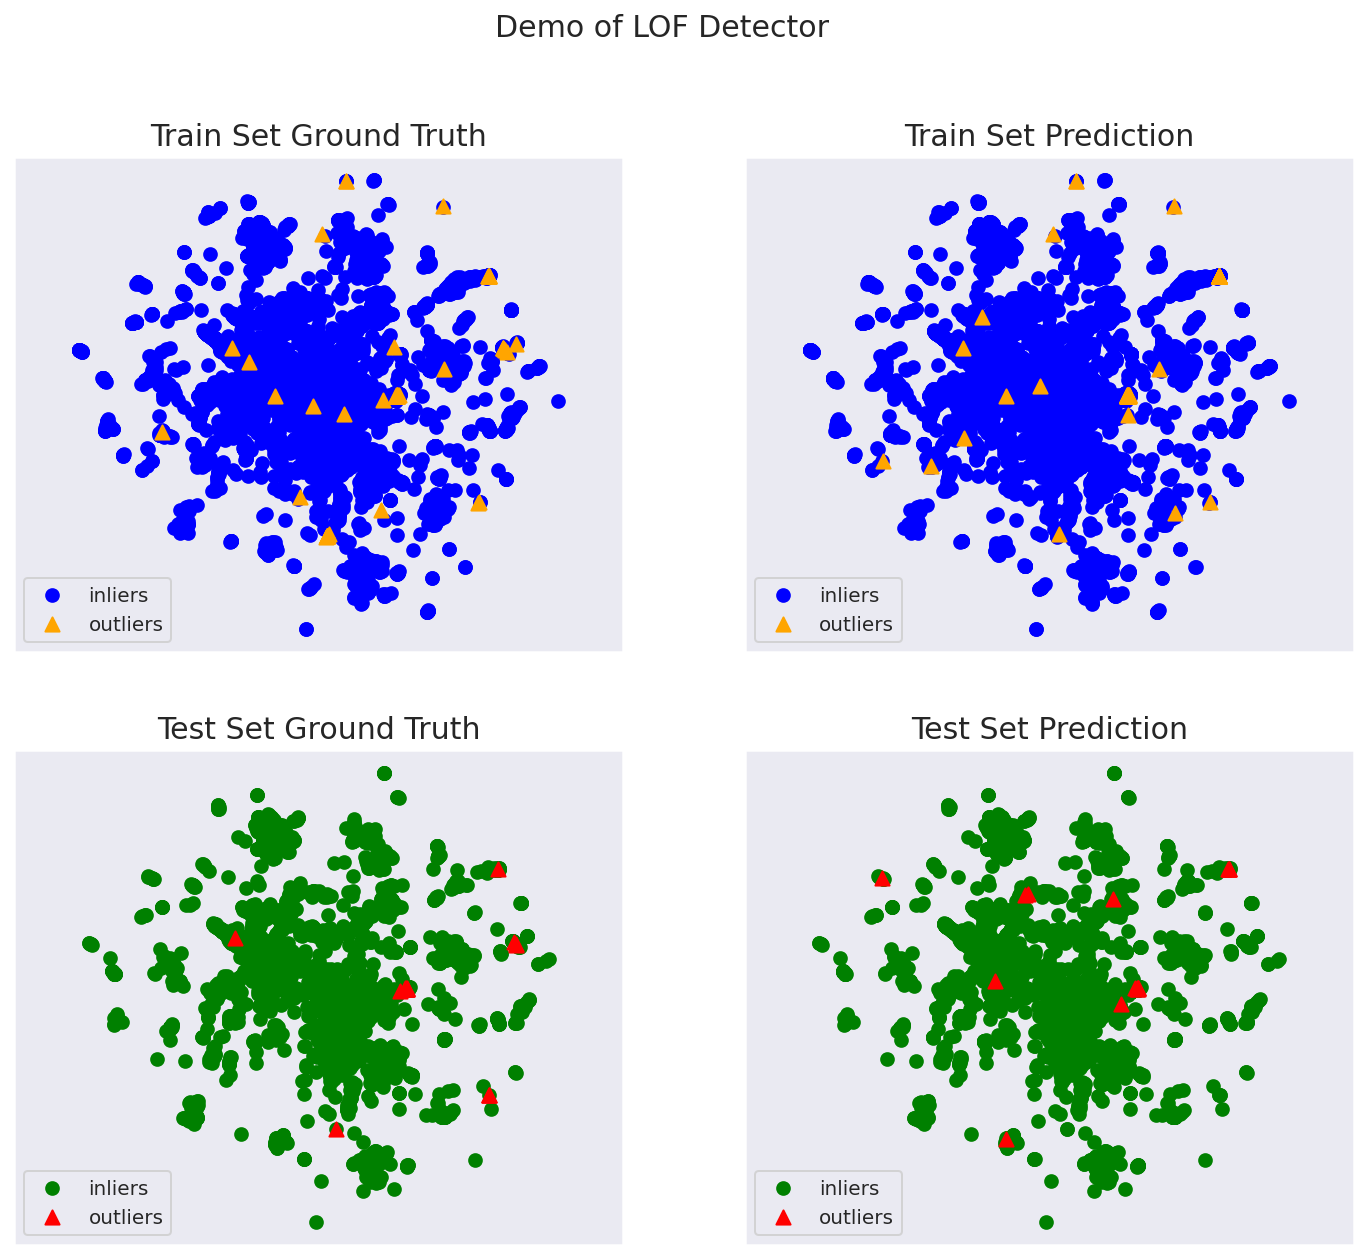

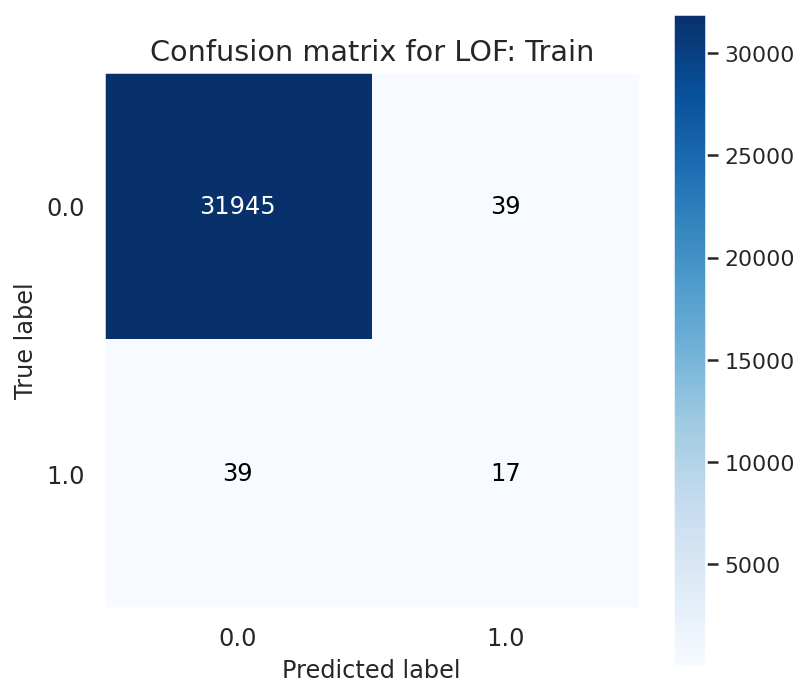

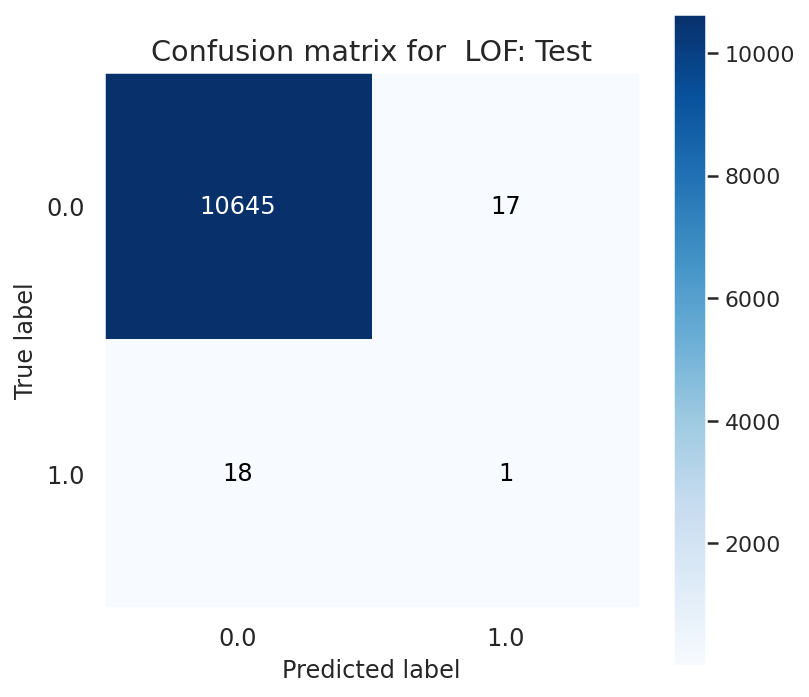

In [20]:
predictions_lof = show_ad(LOF, X, y, contamination=contamination, random_state=random_state)

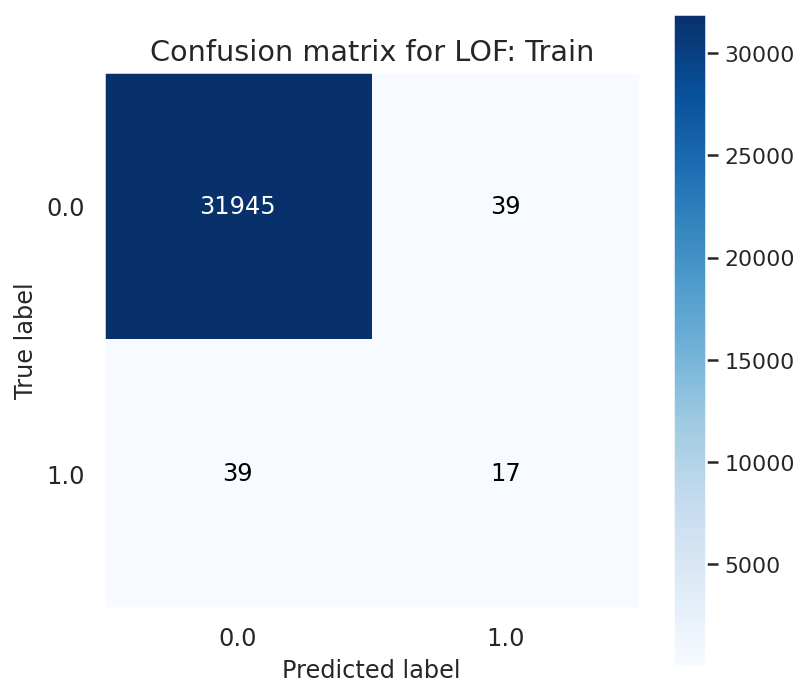

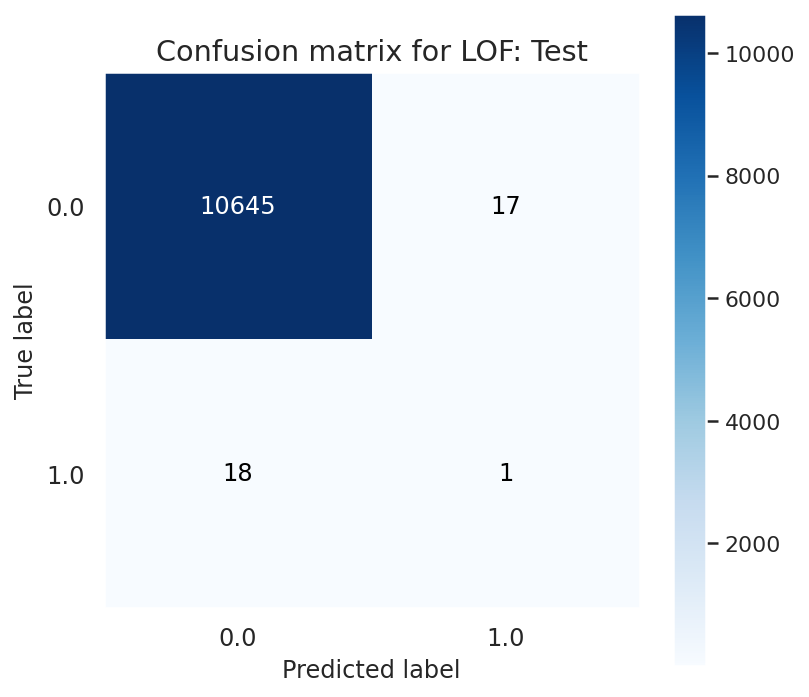

In [21]:
y_train_pred, y_test_pred = predictions_lof
_ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for LOF: Train")
_ = skplt.metrics.plot_confusion_matrix(y_test,y_test_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for LOF: Test")

#### KNN


On Training Data:
LOF(algorithm='auto', contamination=0.00173, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2) ROC:0.8513, precision @ rank n:0.3036
Outliers detected:    56

On Test Data:
LOF(algorithm='auto', contamination=0.00173, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2) ROC:0.8888, precision @ rank n:0.1053
Outliers detected:    18



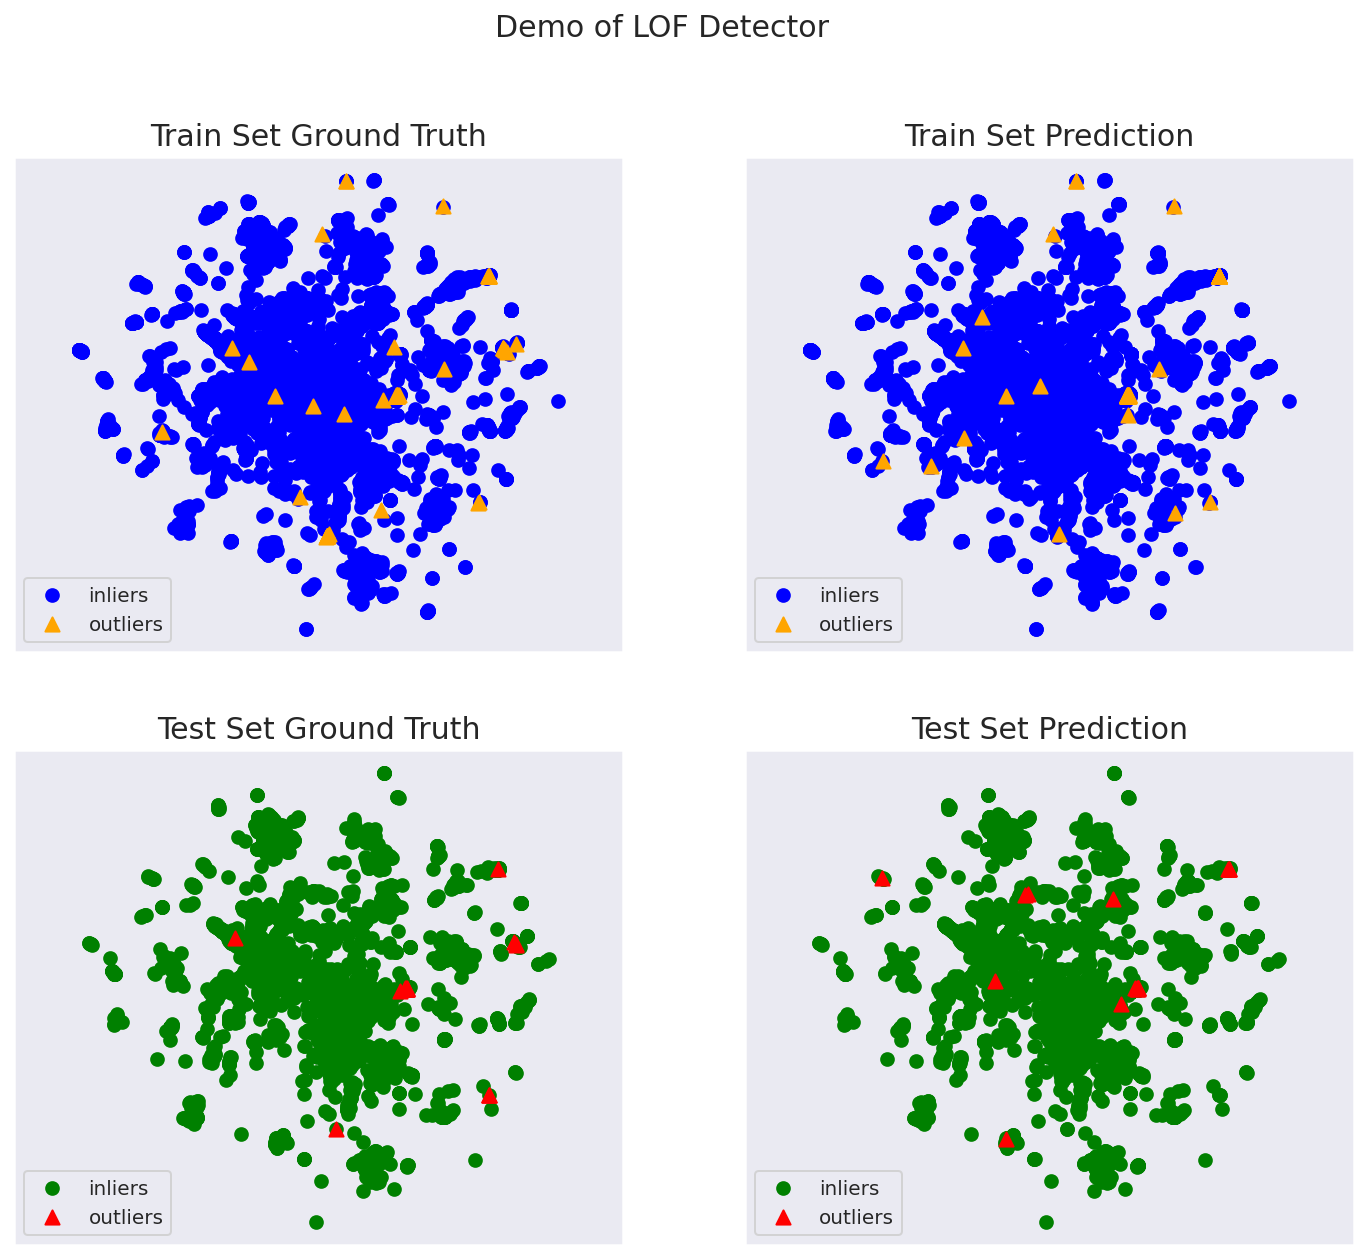

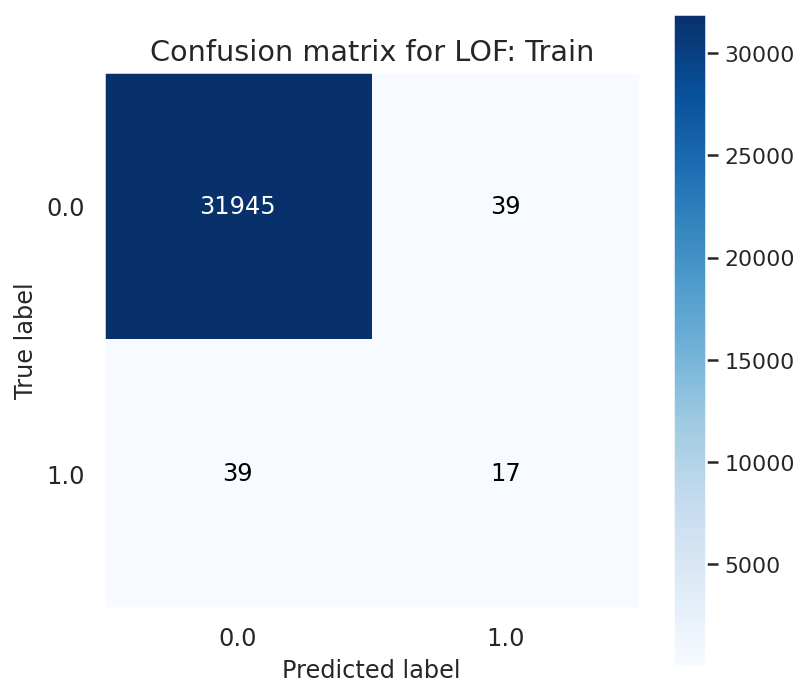

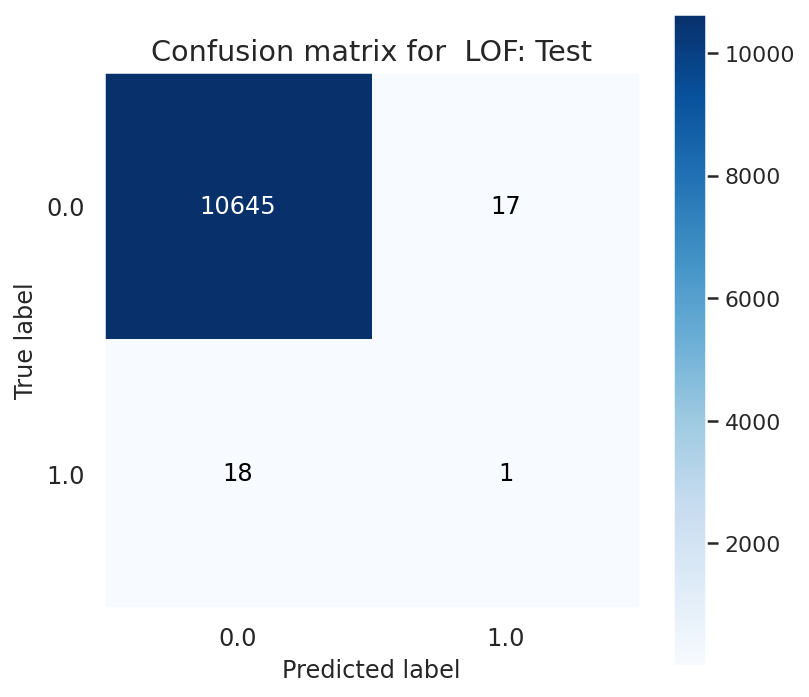

In [22]:
predictions_knn = show_ad(LOF, X, y, contamination=contamination, random_state=random_state)

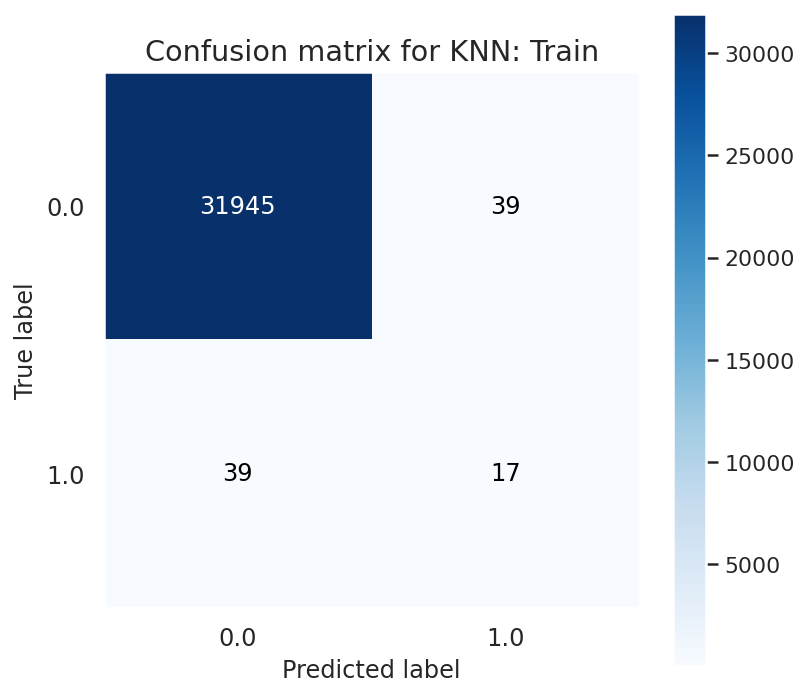

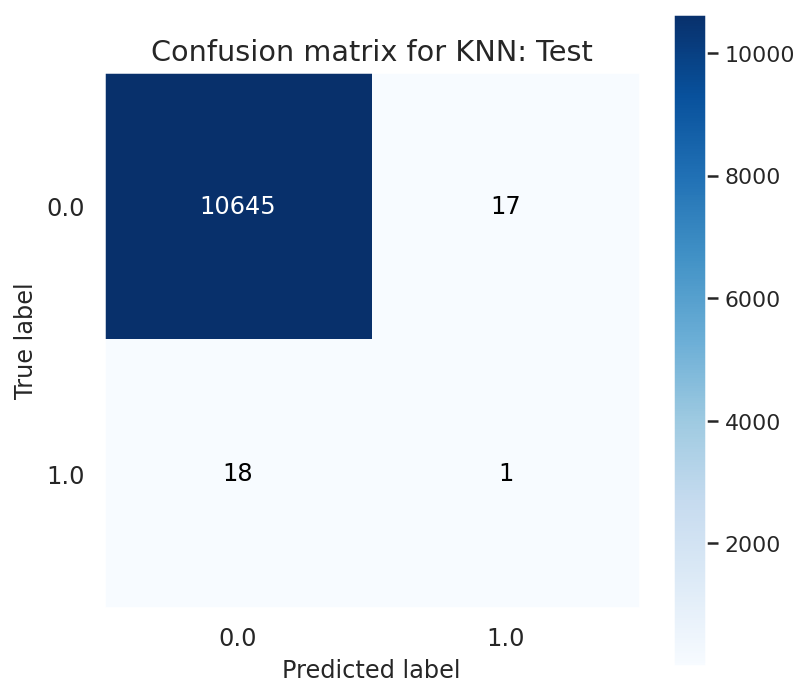

In [23]:
y_train_pred, y_test_pred = predictions_lof
_ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for KNN: Train")
_ = skplt.metrics.plot_confusion_matrix(y_test,y_test_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for KNN: Test")

In [24]:
# show_ad(HBOS, X, y, contamination=contamination) # < -- needs y in fit?

#### COPOD without contamination parameter


On Training Data:
COPOD(contamination=0.1, n_jobs=1) ROC:0.9532, precision @ rank n:0.3571
Outliers detected:  3204

On Test Data:
COPOD(contamination=0.1, n_jobs=1) ROC:0.9272, precision @ rank n:0.3684
Outliers detected:  1036



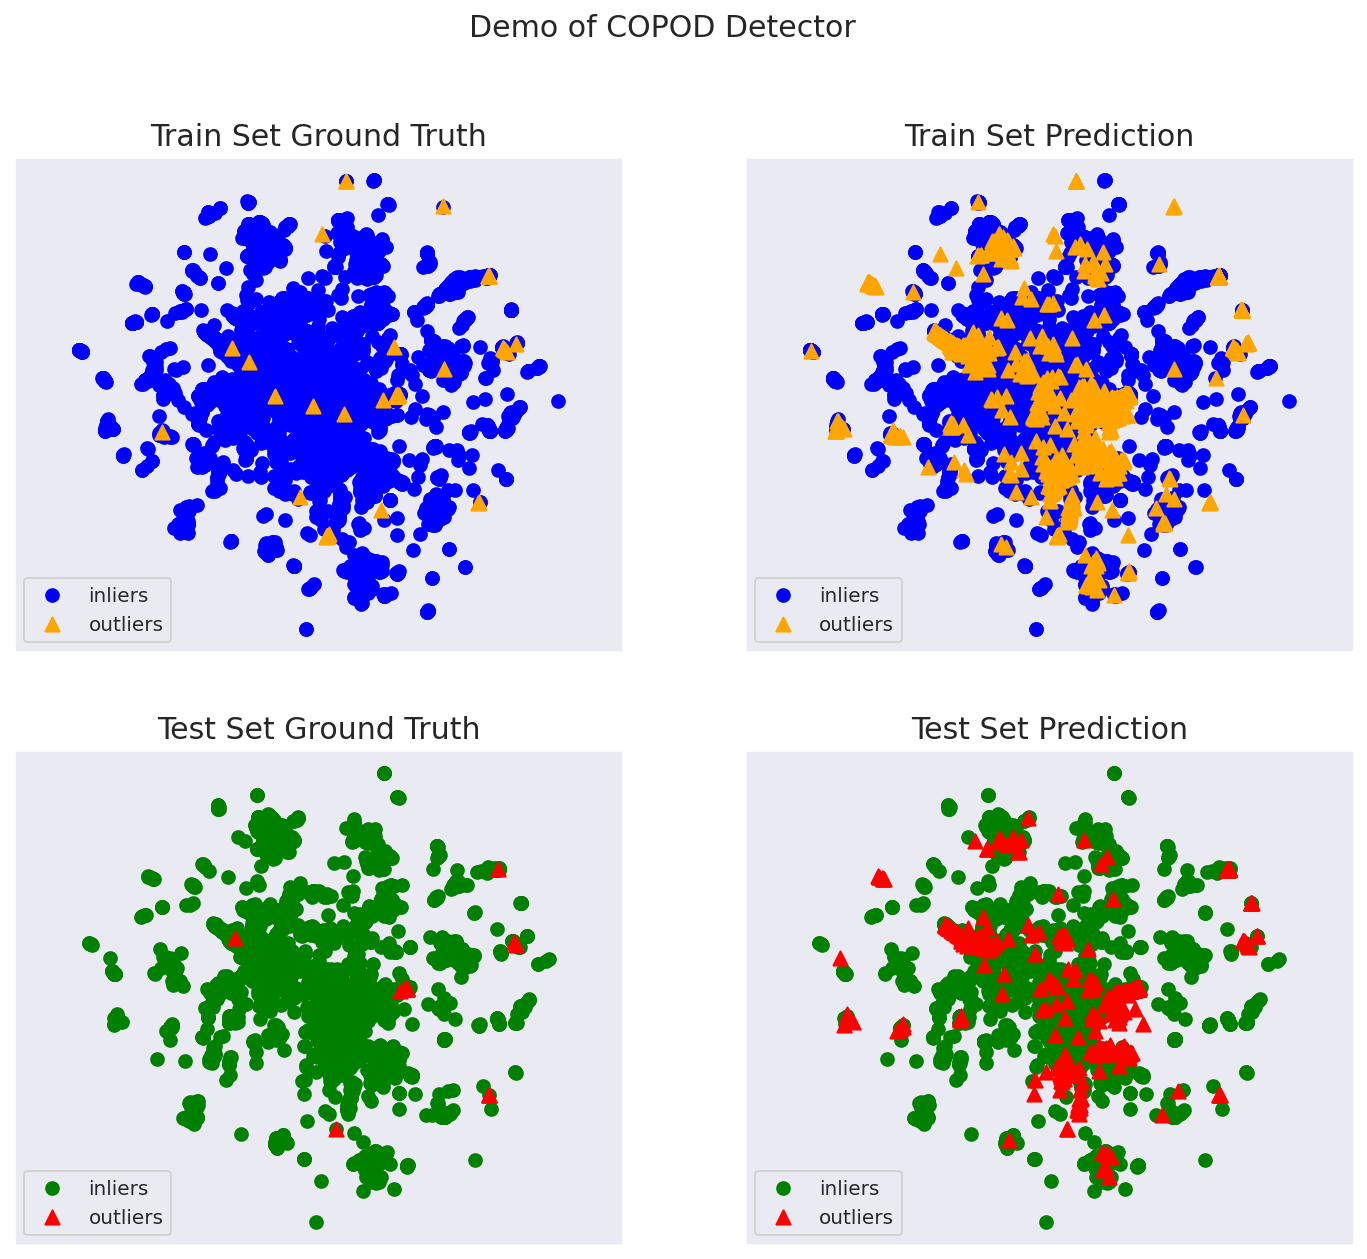

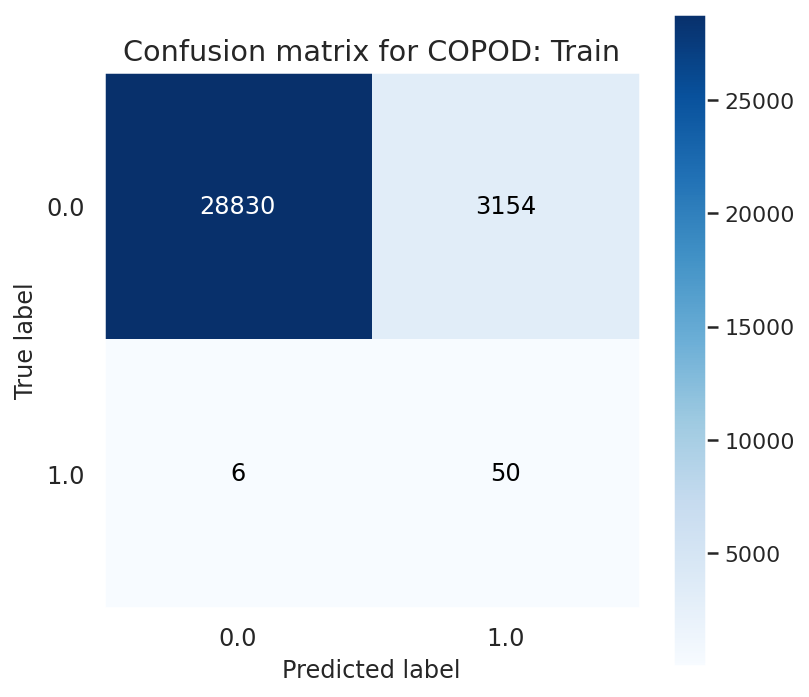

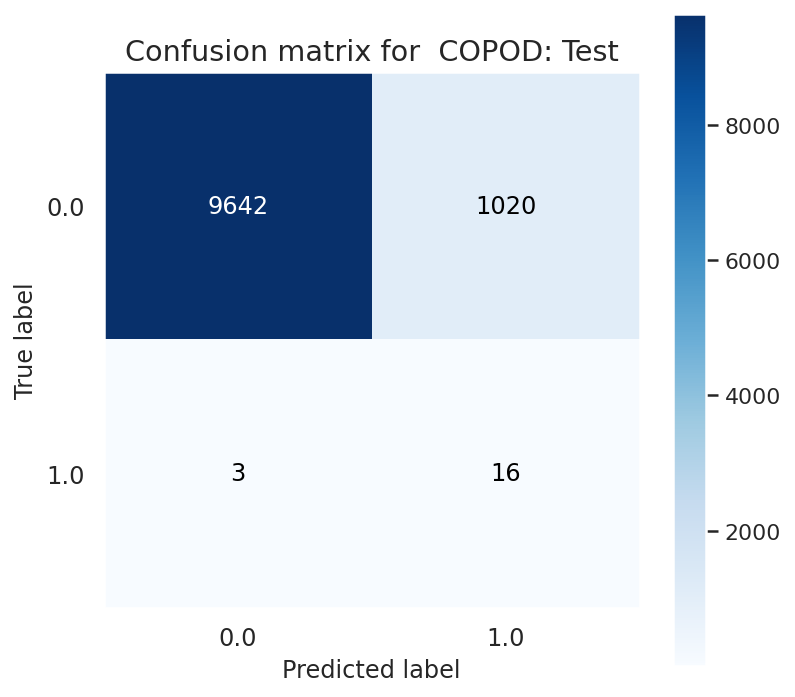

In [25]:
predictions_copod = show_ad(COPOD, X, y)

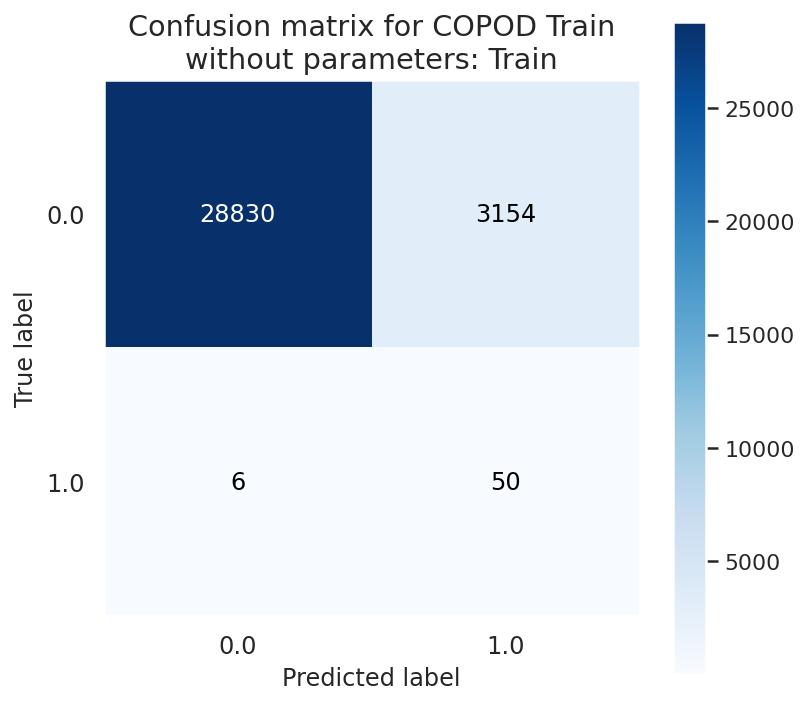

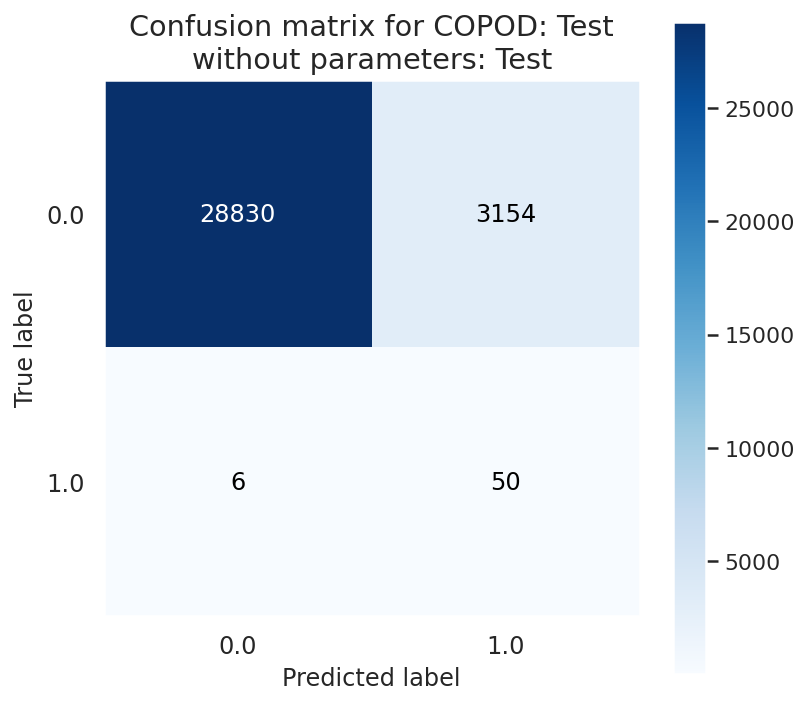

In [26]:
y_train_pred, y_test_pred = predictions_copod
_ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for COPOD Train\nwithout parameters: Train")
_ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for COPOD: Test\nwithout parameters: Test")

#### COPOD with contamination parameter


On Training Data:
COPOD(contamination=0.00173, n_jobs=1) ROC:0.9532, precision @ rank n:0.3571
Outliers detected:    56

On Test Data:
COPOD(contamination=0.00173, n_jobs=1) ROC:0.9272, precision @ rank n:0.3684
Outliers detected:    25



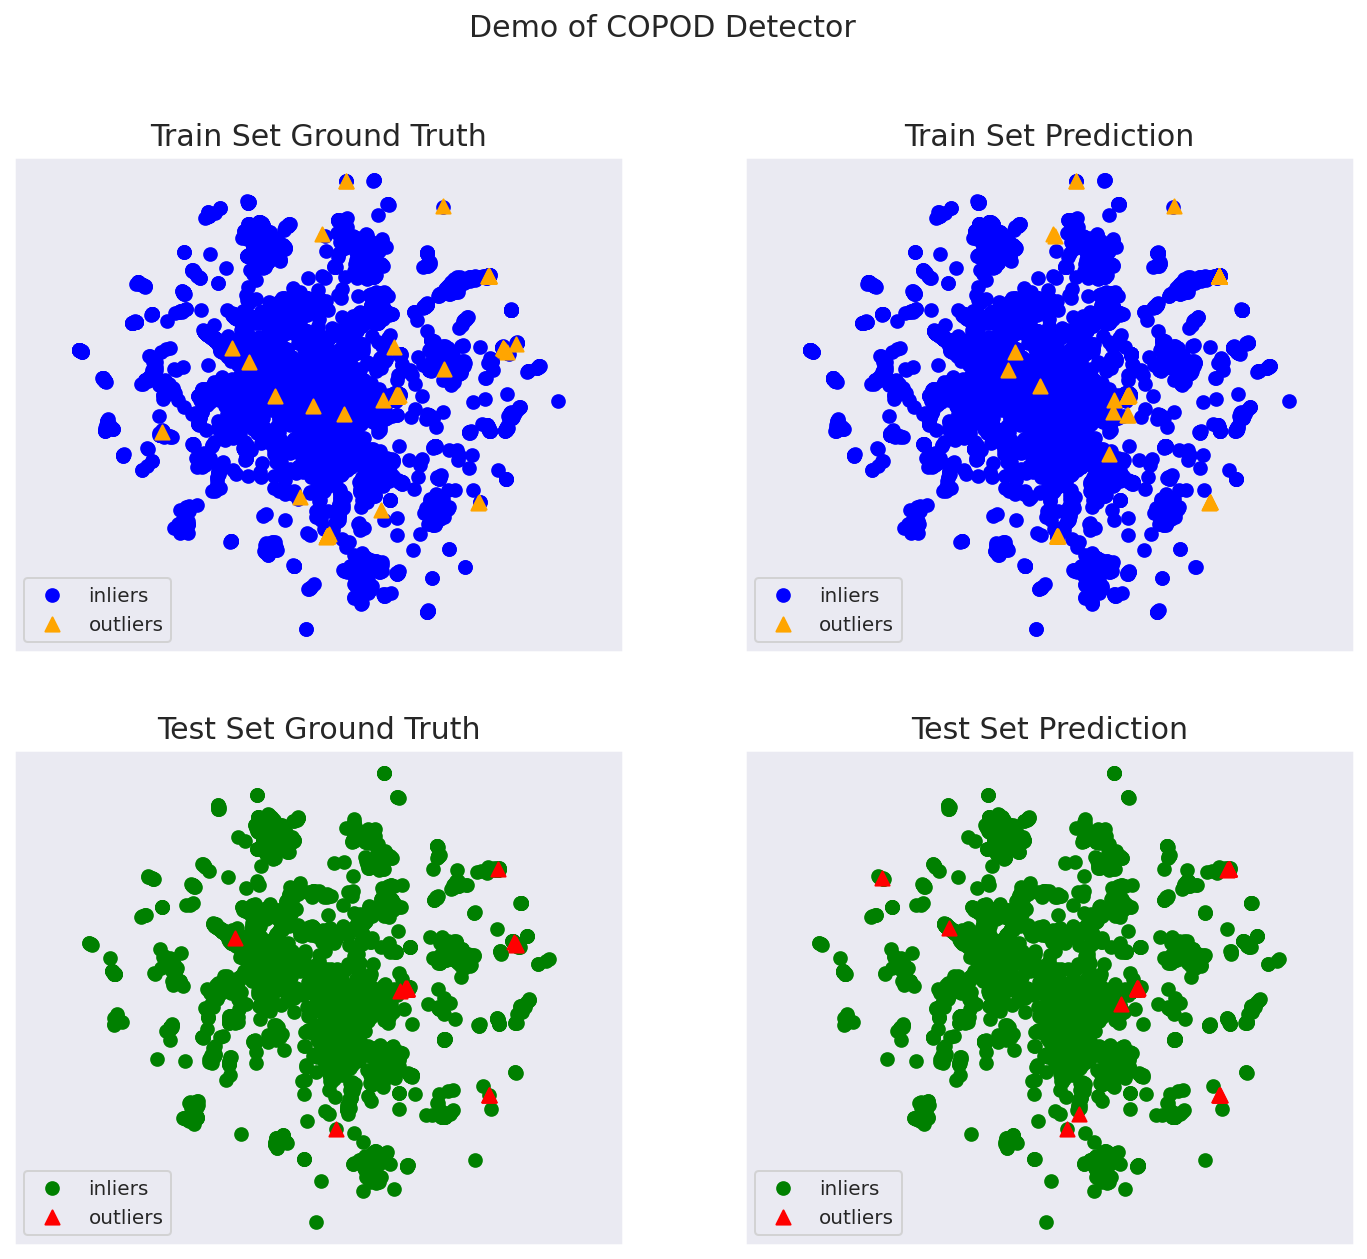

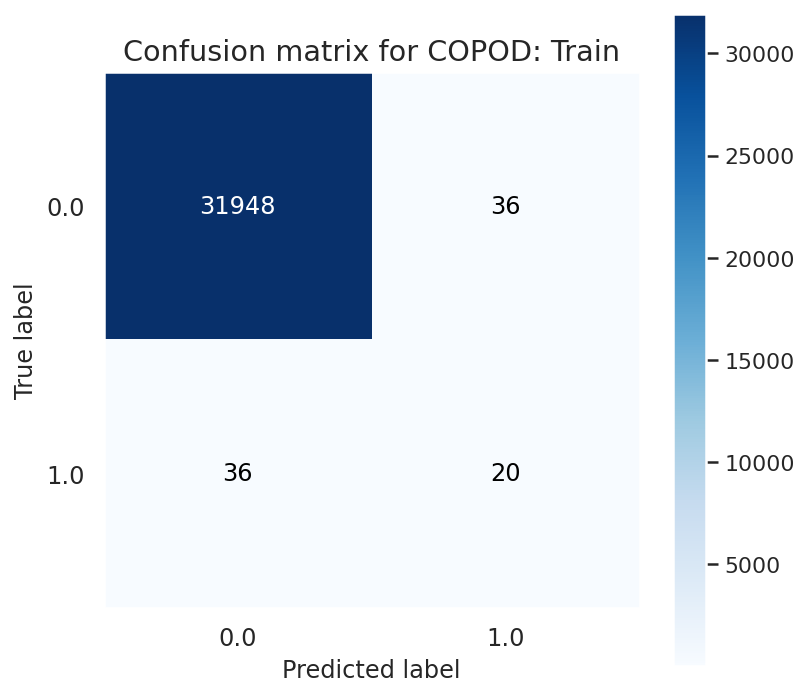

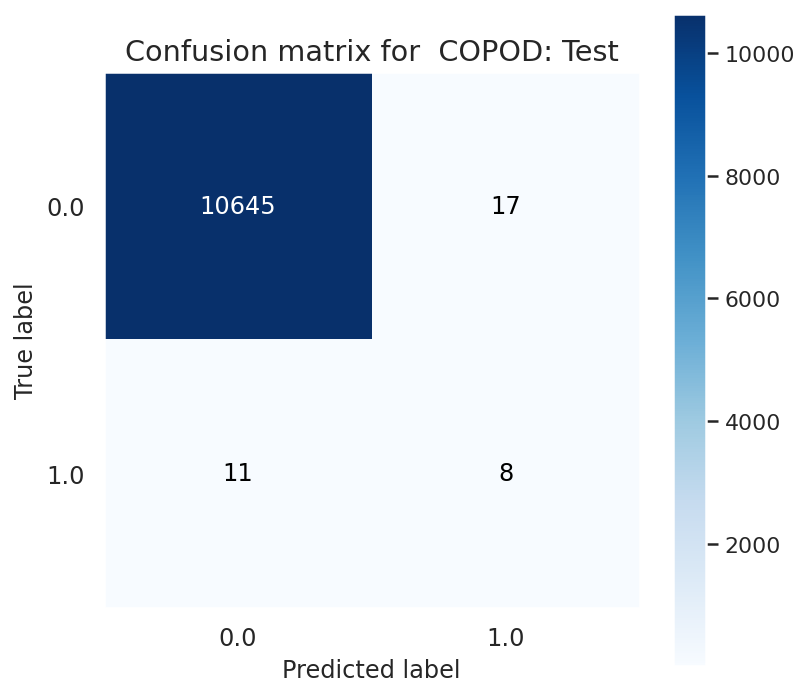

In [27]:
predictions_copod_with_params = show_ad(COPOD, X, y, contamination = contamination)

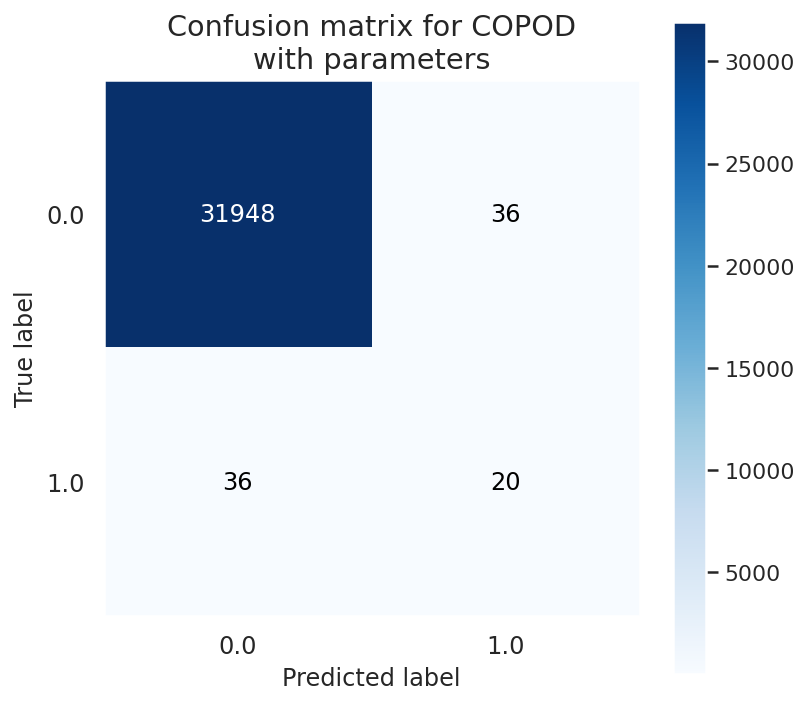

In [28]:
y_train_pred, y_test_pred = predictions_copod_with_params
_ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for COPOD\nwith parameters")

In [29]:
%%script false --no-raise-error

show_ad(LOCI, X, y, contamination = contamination) # <--- too large a dataset

#### Parallel estimation with several models avaraging (SUOD)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished



On Training Data:
SUOD(approx_clf=None, approx_clf_list=None, approx_flag_global=True,
   approx_ng_clf_list=None,
   base_estimators=[LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=15, novelty=True, p=2), LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2...features=1.0,
    max_samples='auto', n_estimators=200, n_jobs=1, random_state=None,
    verbose=0)],
   bps_flag=True, combination='average', contamination=0.00173,
   cost_forecast_loc_fit=None, cost_forecast_loc_pred=None,
   jl_method='basic', n_jobs=None, rp_clf_list=None, rp_flag_global=True,
   rp_ng_clf_list=None, target_dim_frac=0.5, verbose=False) ROC:0.9567, precision @ rank n:0.2857
Outliers detected:    56

On Test Data:
SUOD(approx_clf=None, approx_clf_list=None, approx_flag_global=True,
   approx_ng_clf_list=None,
   base_estimators=[LOF(algorithm='auto', c

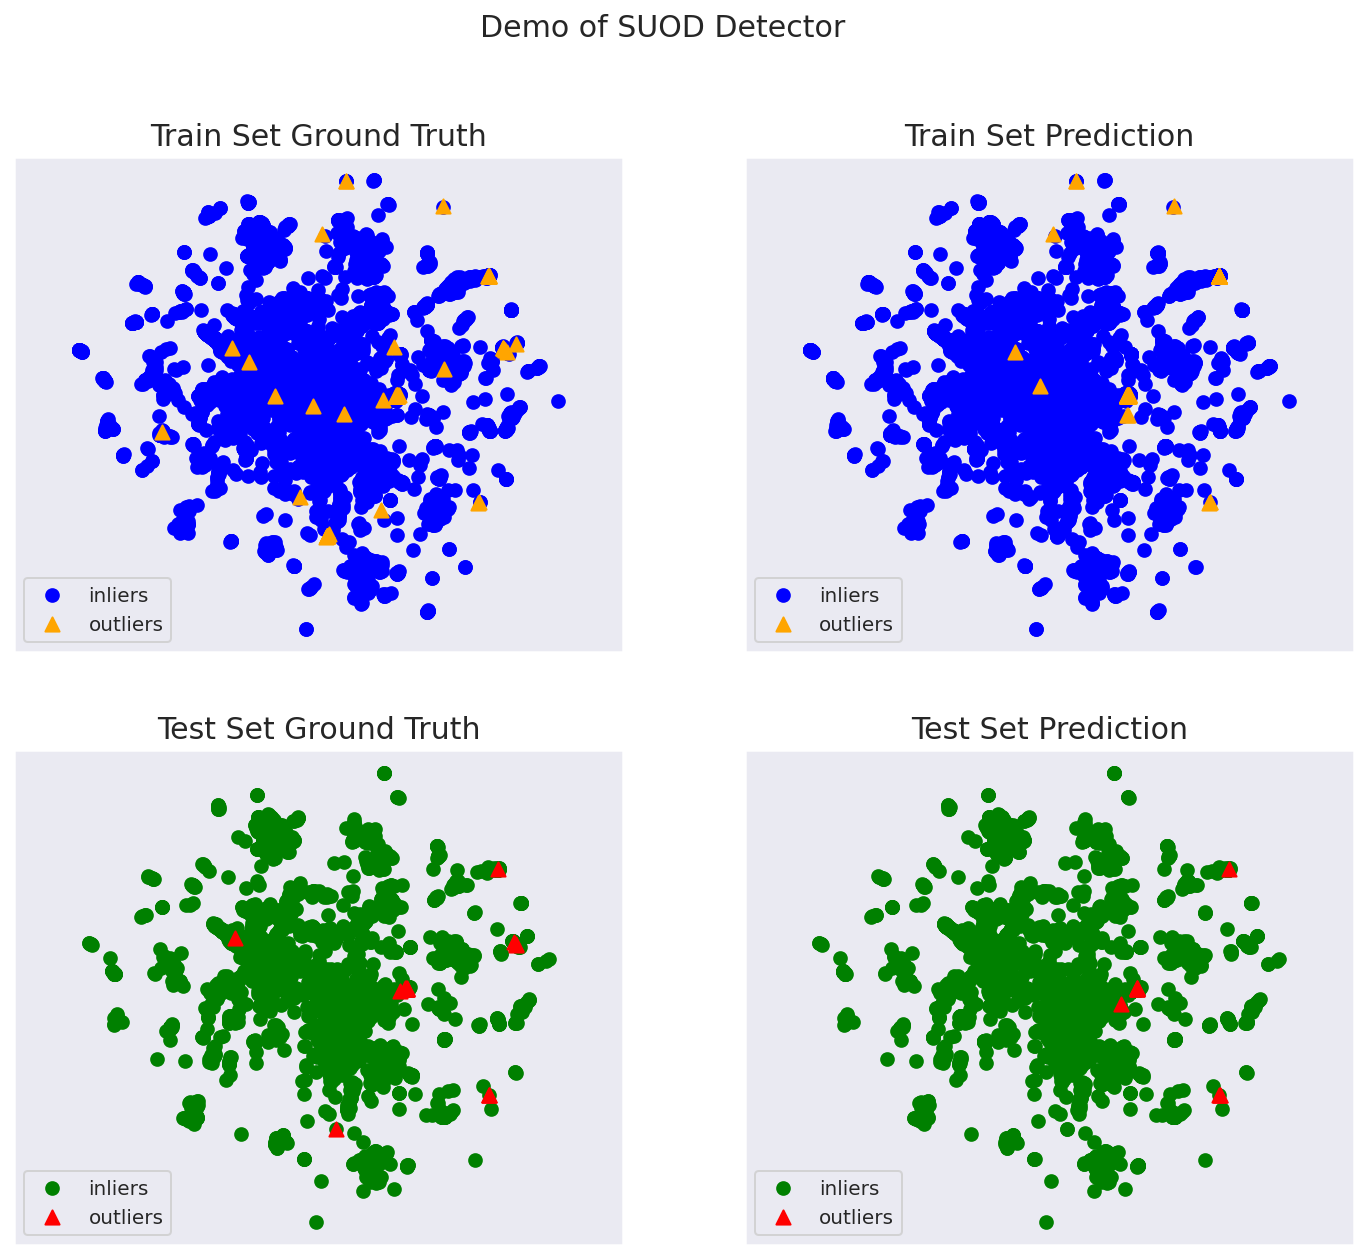

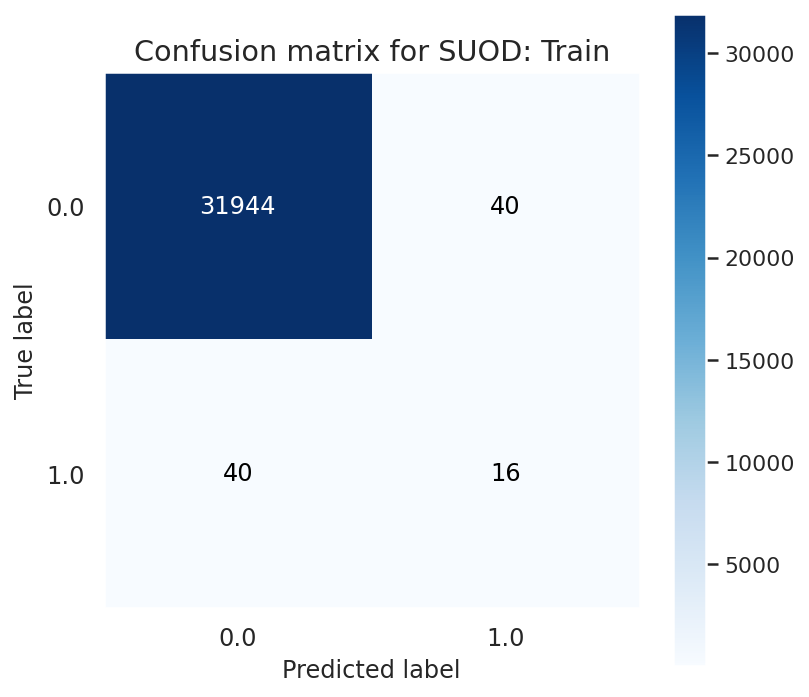

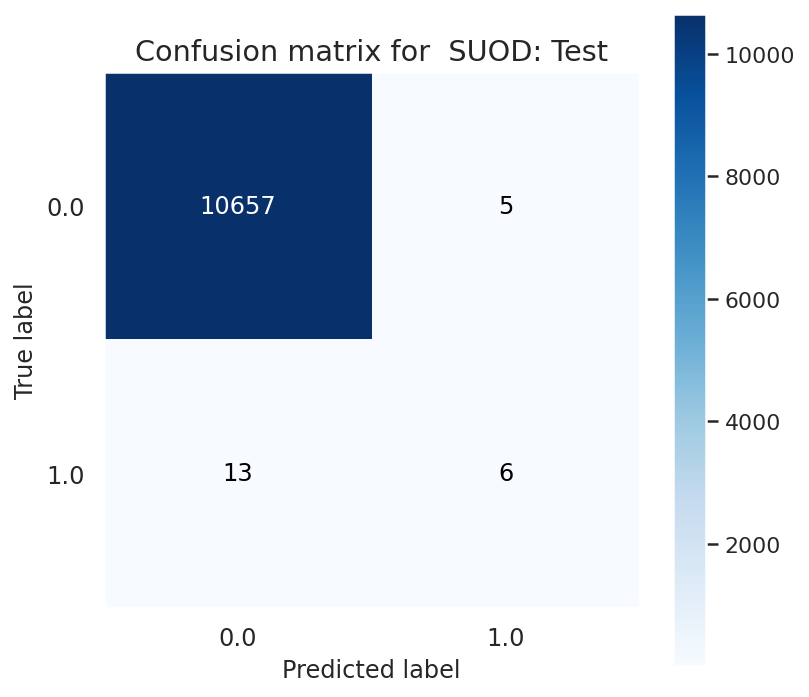

In [30]:
detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
                 LOF(n_neighbors=25), LOF(n_neighbors=35),
                 COPOD(), IForest(n_estimators=100),
                 IForest(n_estimators=200)]

y_train_pred, y_test_pred = show_ad(SUOD, X, y, 
                                    base_estimators=detector_list, 
                                    n_jobs=n_jobs, combination='average', 
                                    contamination = contamination, 
                                    random_state=random_state)

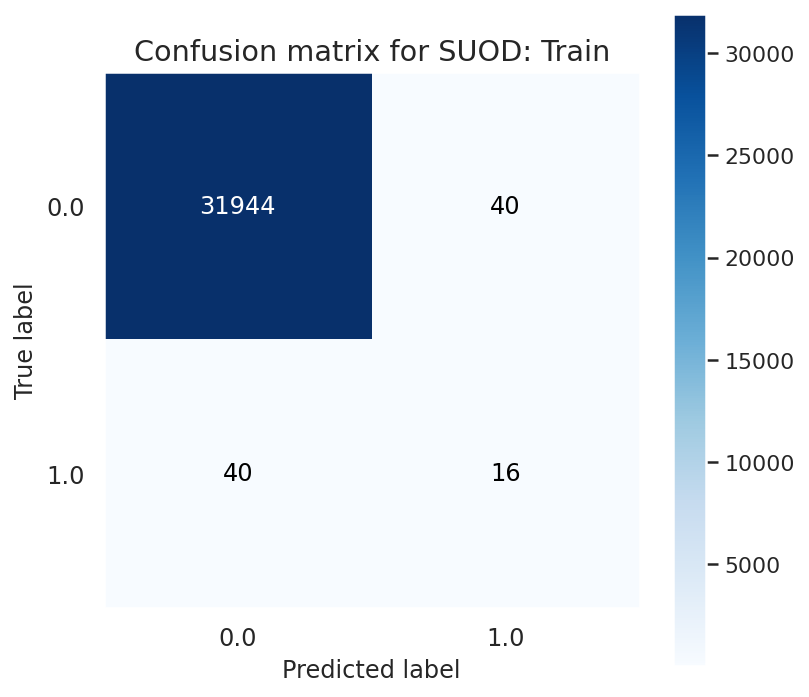

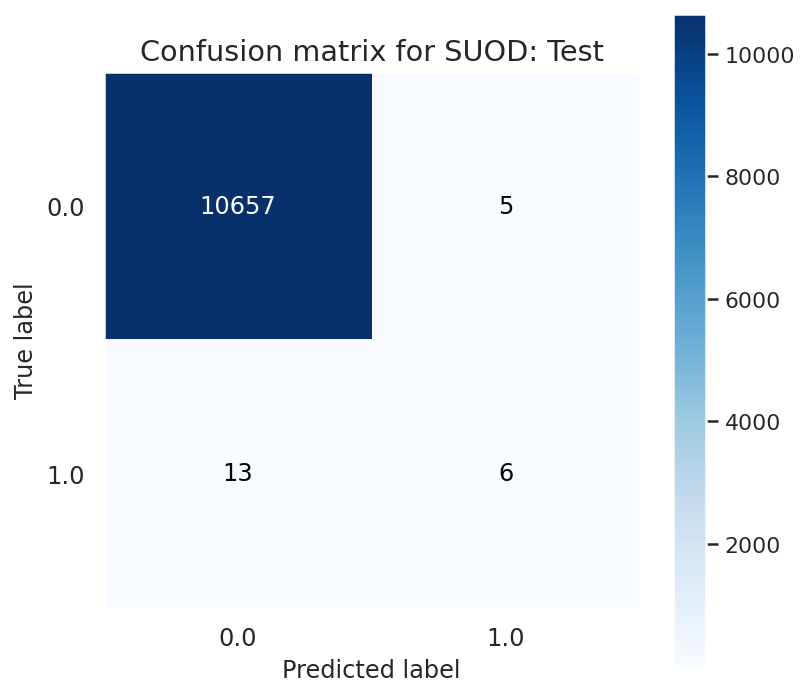

In [31]:
_ = skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for SUOD: Train")
_ = skplt.metrics.plot_confusion_matrix(y_test,y_test_pred, normalize=False, \
                        figsize=(6,6), title="Confusion matrix for SUOD: Test")

### Visualize results in 3D

In [32]:
def visualize_3d(X, y, title):
    X_color = ["outliers" if x==1 else "inliers" for x in y]
    features = X.values
    n_features = features.shape[1]

    # UMAP-transform feature space
    umap = UMAP(n_components=3, init='random',
                   random_state=random_state)
    proj = umap.fit_transform(features)

    fig = px.scatter_3d(
        proj, x=0, y=1, z=2,
        color=X_color, labels={'color': ''},
        title=title,
        width=720, height=480,
        template="plotly_dark"
    )
    fig.update_traces(marker_size=5)
    fig.show()

In [33]:
visualize_3d(X_train, y_train, title="Ground truth on train data")
visualize_3d(X_train, y_train_pred, title="Predictions on train data")

In [34]:
visualize_3d(X_test, y_test, title="Ground truth on test data")
visualize_3d(X_test, y_test_pred, title="Predictions on test data")

### Observations

<div class="alert alert-block alert-success">
<b>PyOD AD library:</b> Given the dataset impurity aka contamination parameter, all methods give reasonably good results. COPOD (Copula-based Outlier Detection) method, being a recent non-parametric addition to the AD algorithms family, gives better results out of the box, on par with bagging offered by SUOD.
</div>